#RNA family characterization

Application scenario: we want to characterize RNA family, identifying regions with their structural contexts that are characteristic of the family

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from eden.util import configure_logging
import logging
logger = logging.getLogger()
configure_logging(logger,verbosity=1)

In [2]:
import logging
from eden.util import configure_logging
configure_logging(logging.getLogger(), verbosity=2)

given the RFAM id of a family we retrieve it from the RFAM online database
composing the correspondent URL

In [3]:
def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)

In [4]:
rfam_id = 'RF00871' #microRNA mir-689

In [5]:
rfam_id = 'RF00380' #

In [6]:
rfam_id = 'RF00005' #tRNA

In [7]:
rfam_id = 'RF02275' #Hammerhead_HH9

In [8]:
#parameters for visualization
opts={'size':14, 'node_border':False, 'node_size':200, 'font_size':9, 'vertex_alpha':0.6,'title_key':'id'}

from eden.util.display import draw_graph, serialize_graph
import itertools
def plot(graphs, num=3, file_name=None, opts=None):    
    graphs = itertools.islice(graphs,num)
    for i,graph in enumerate(graphs): 
        if file_name is not None:
            draw_graph(graph, file_name=file_name+str(i)+'.png', **opts)
        else:
            draw_graph(graph, **opts)

In [51]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.fasta import sequence_to_eden
    graphs = sequence_to_eden(seqs)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G'])
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


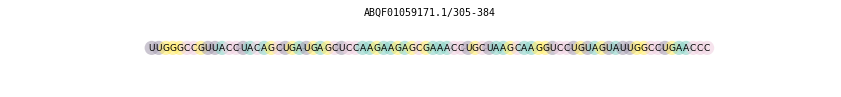

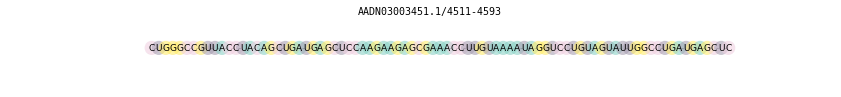

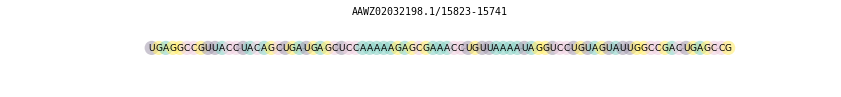

In [52]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set3', 'prog':'circo', 'size_x_to_y_ratio':10})
plot(graphs,opts=my_opt)

In [53]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
   
    from eden.converter.rna.rnashapes_struct import rnashapes_struct_to_eden
    graphs = rnashapes_struct_to_eden(seqs, energy=True, shape=True, dotbracket=True, split_components=False, shape_type=5, energy_range=35, max_num=3)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['.','(',')','[',']','x','0','1','2','3','4','5','6','7','8','9'])
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


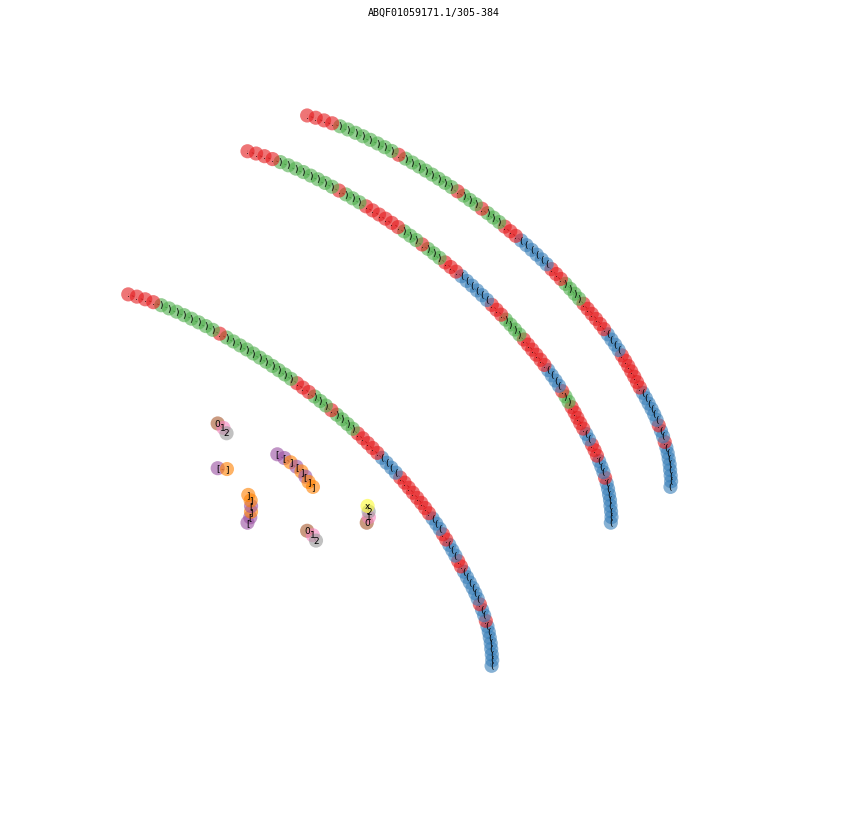

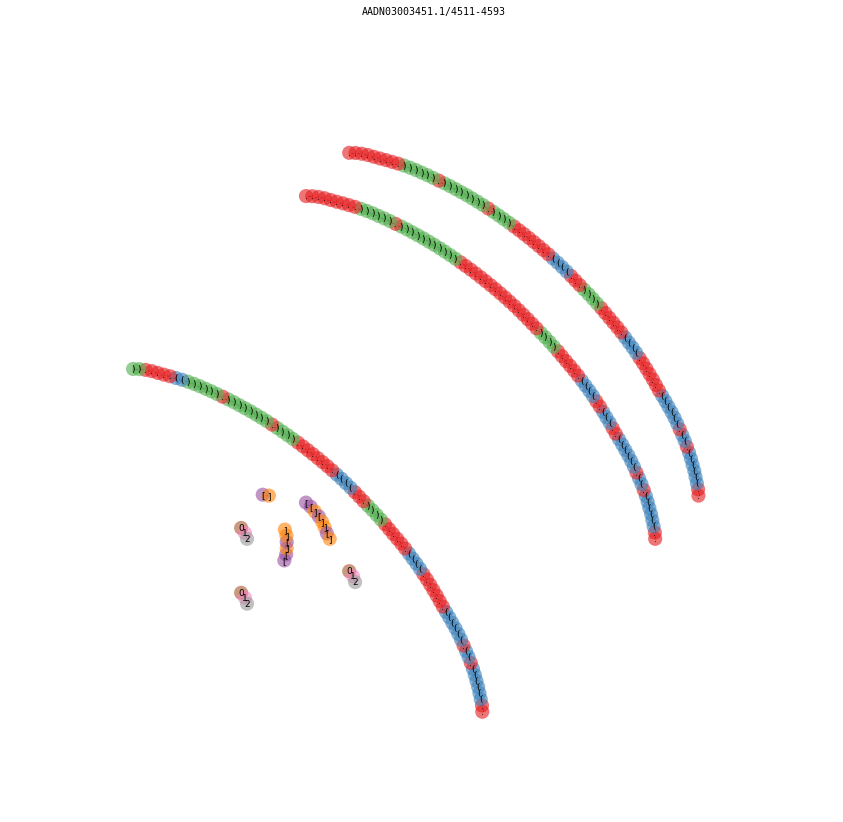

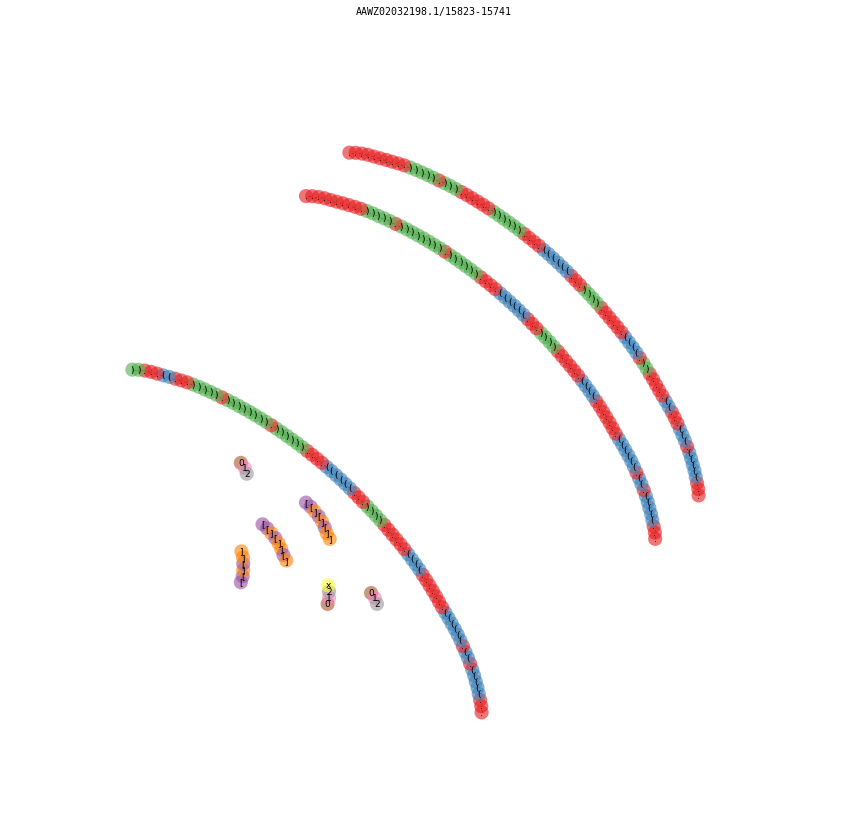

In [54]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set1'})
plot(graphs,opts=my_opt)

In [55]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnafold import rnafold_to_eden
    graphs = rnafold_to_eden(seqs)

    from eden.modifier.graph import vertex_attributes
    graphs = vertex_attributes.trapezoidal_reweighting(graphs,
                                                       high_weight = 1, low_weight = 0.0, 
                                                       high_weight_window_start = 20, high_weight_window_end = 30, 
                                                       low_weight_window_start = 10, low_weight_window_end = 40)
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


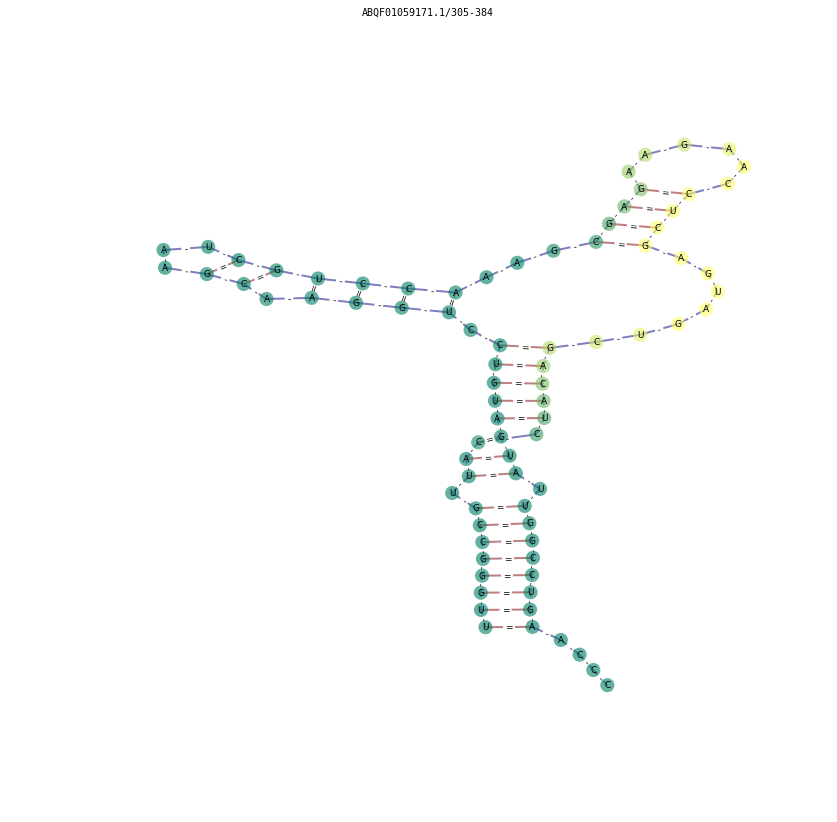

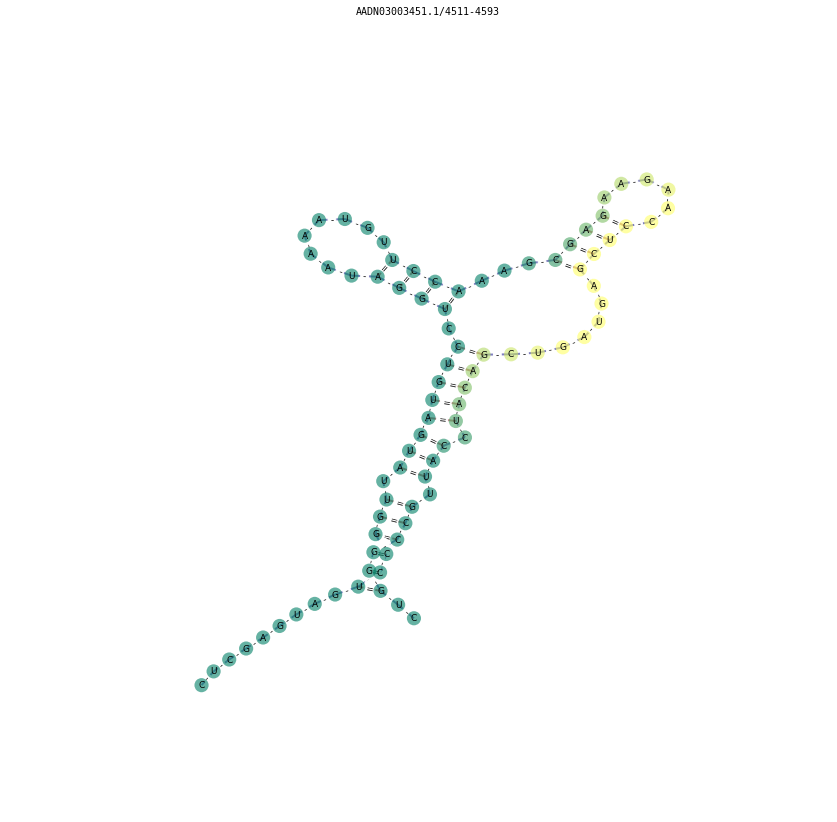

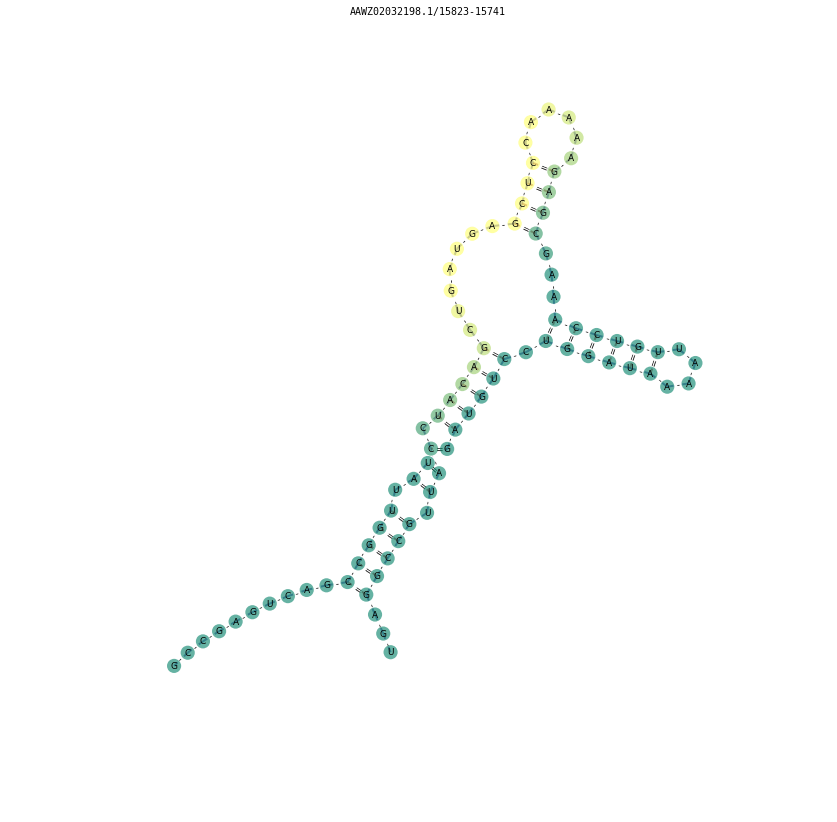

In [56]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer', 'edge_color':'_labels_'})
plot(graphs,opts=my_opt)

In [57]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnaplfold import rnaplfold_to_eden
    graphs = rnaplfold_to_eden(seqs, window_size = 150, max_bp_span = 100, avg_bp_prob_cutoff = 0.01, max_num_edges = 3)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G'])

    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


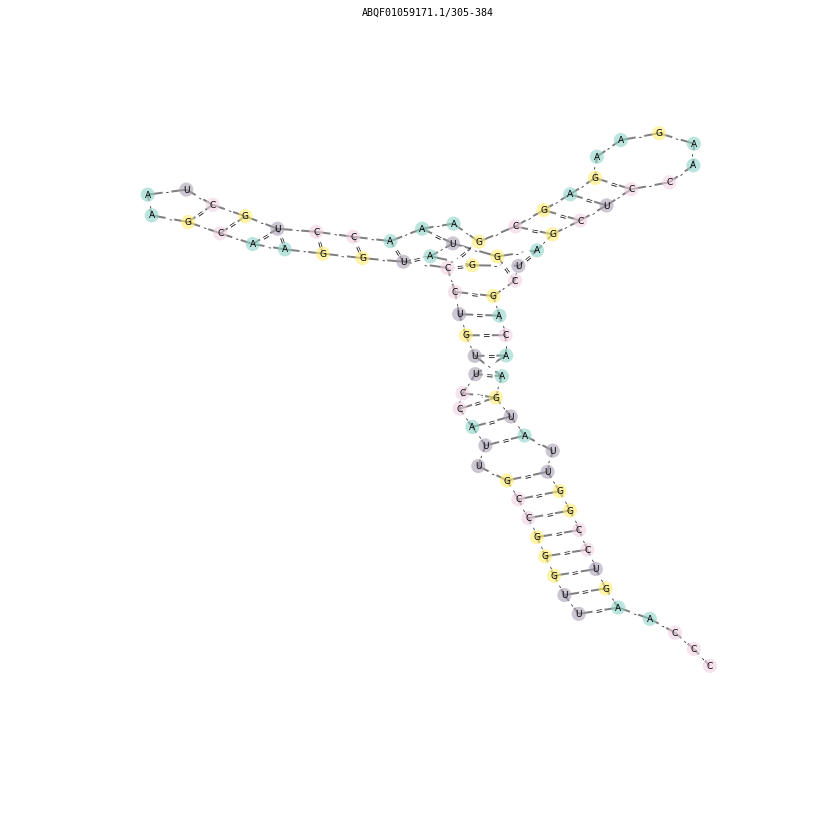

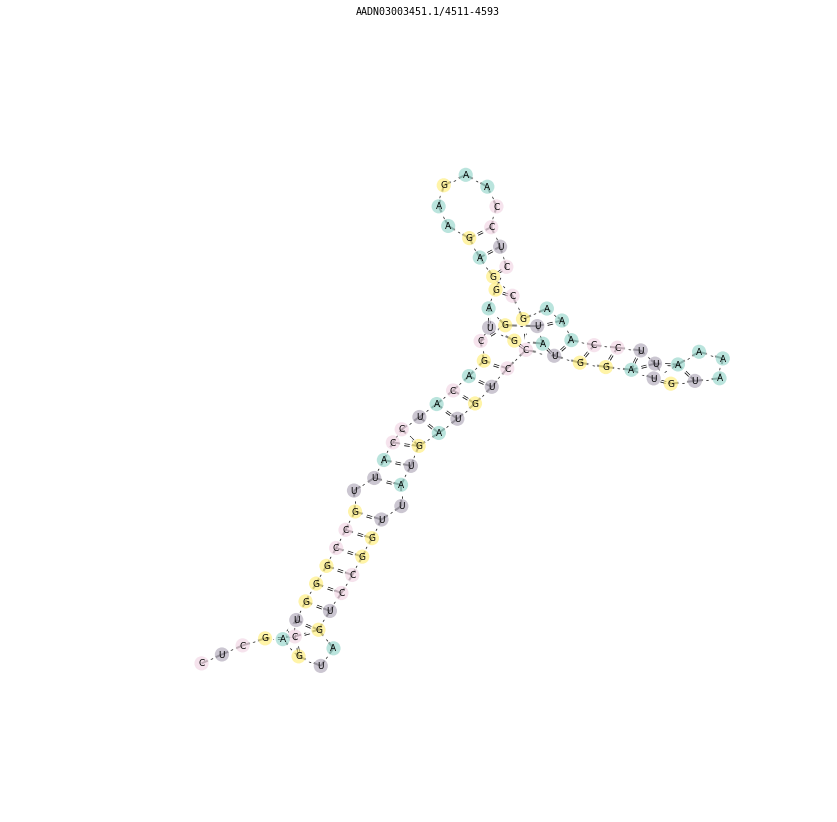

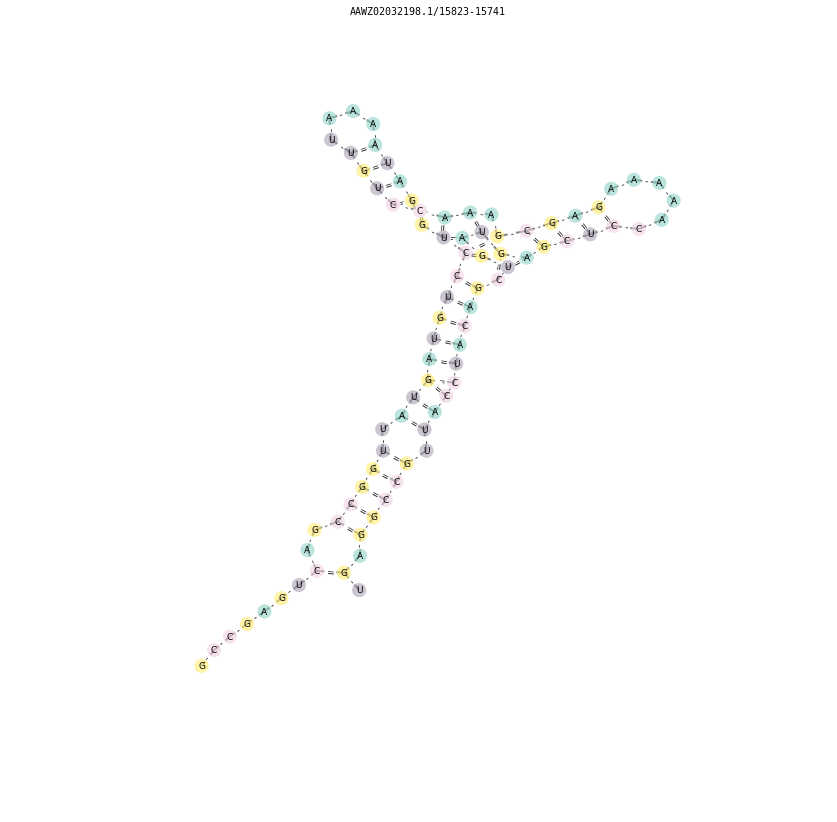

In [58]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'level', 'colormap':'Set3'})
plot(graphs,opts=my_opt)

In [59]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnaplfold import rnaplfold_to_eden
    graphs = rnaplfold_to_eden(seqs, window_size = 150, max_bp_span = 100, avg_bp_prob_cutoff = 0.01, max_num_edges = 3)

    from eden.modifier.graph import structure 
    graphs = structure.make_edge_type_into_nesting(graphs)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['A','U','C','G'])

    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


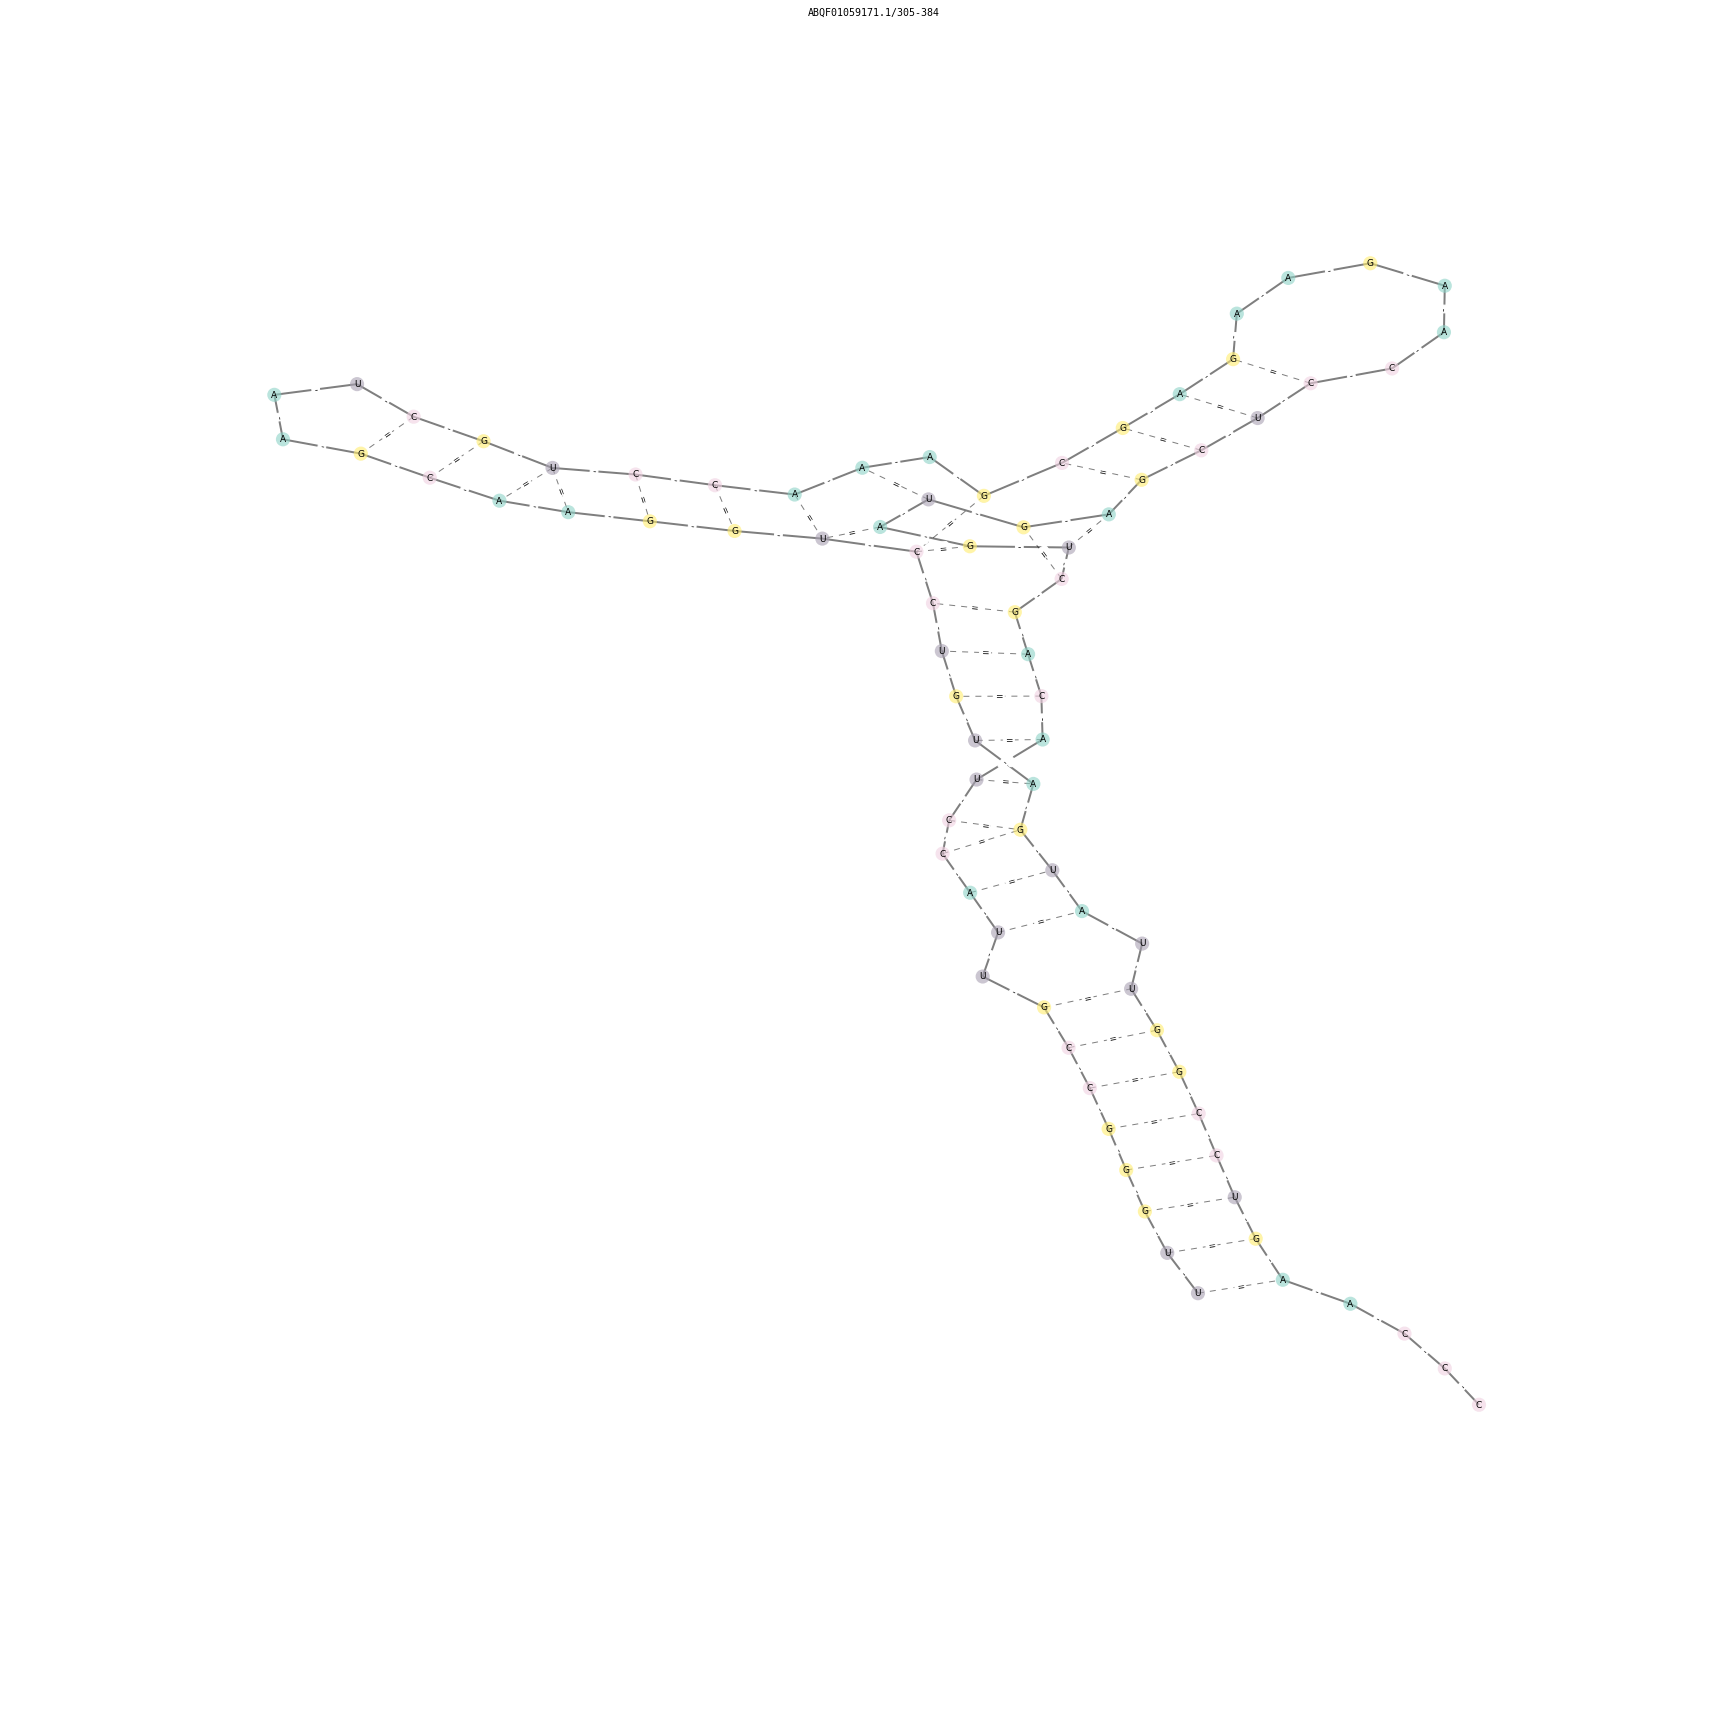

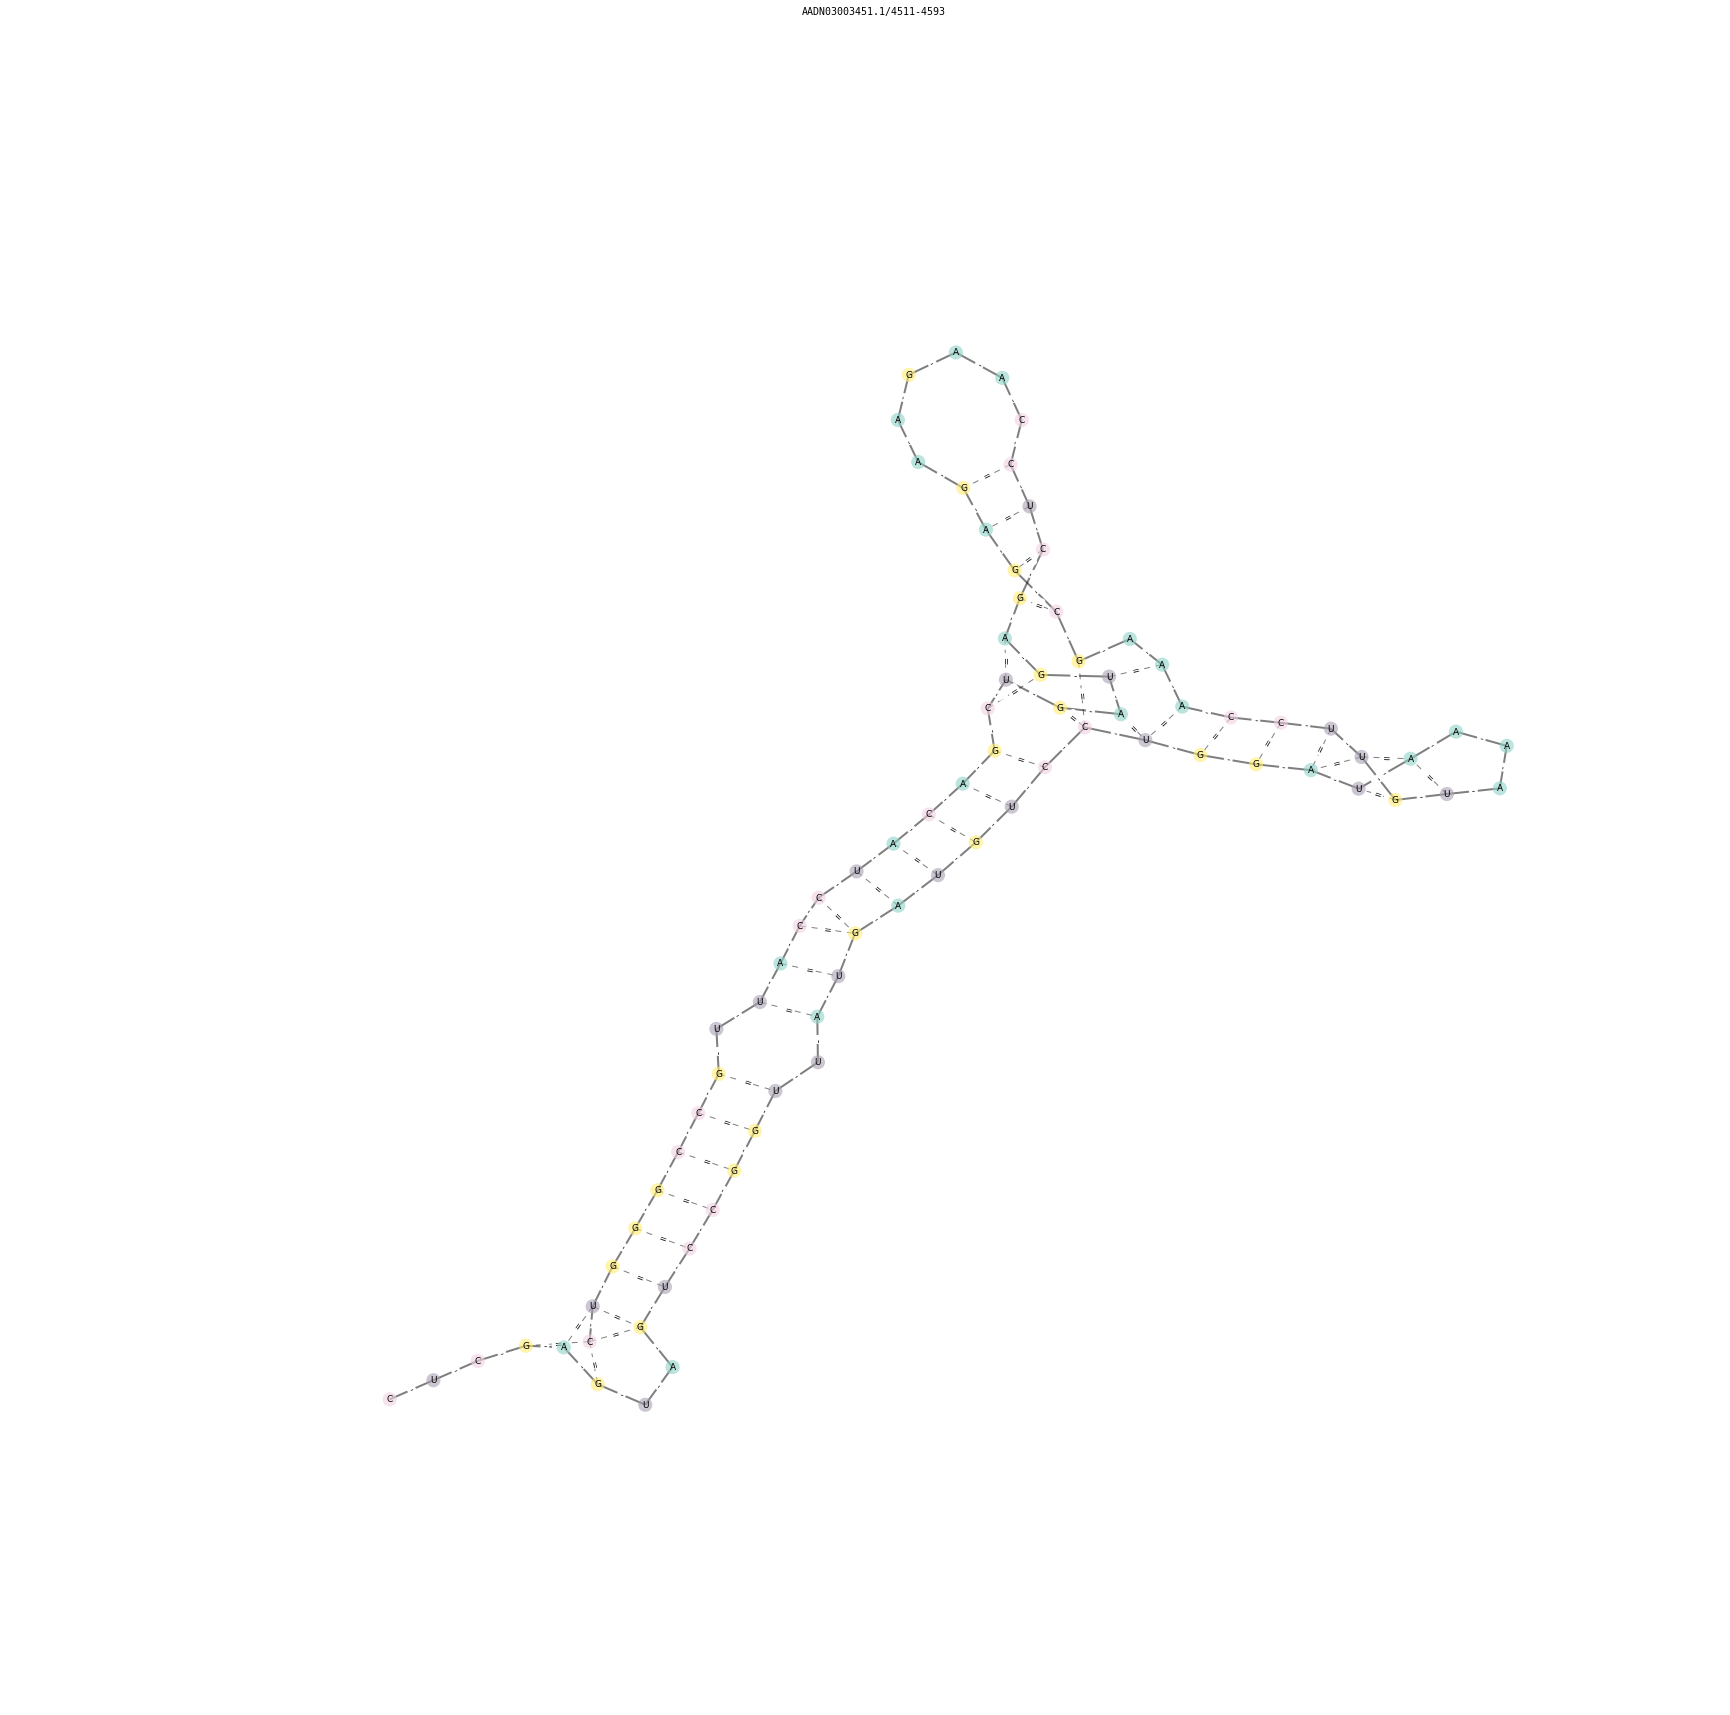

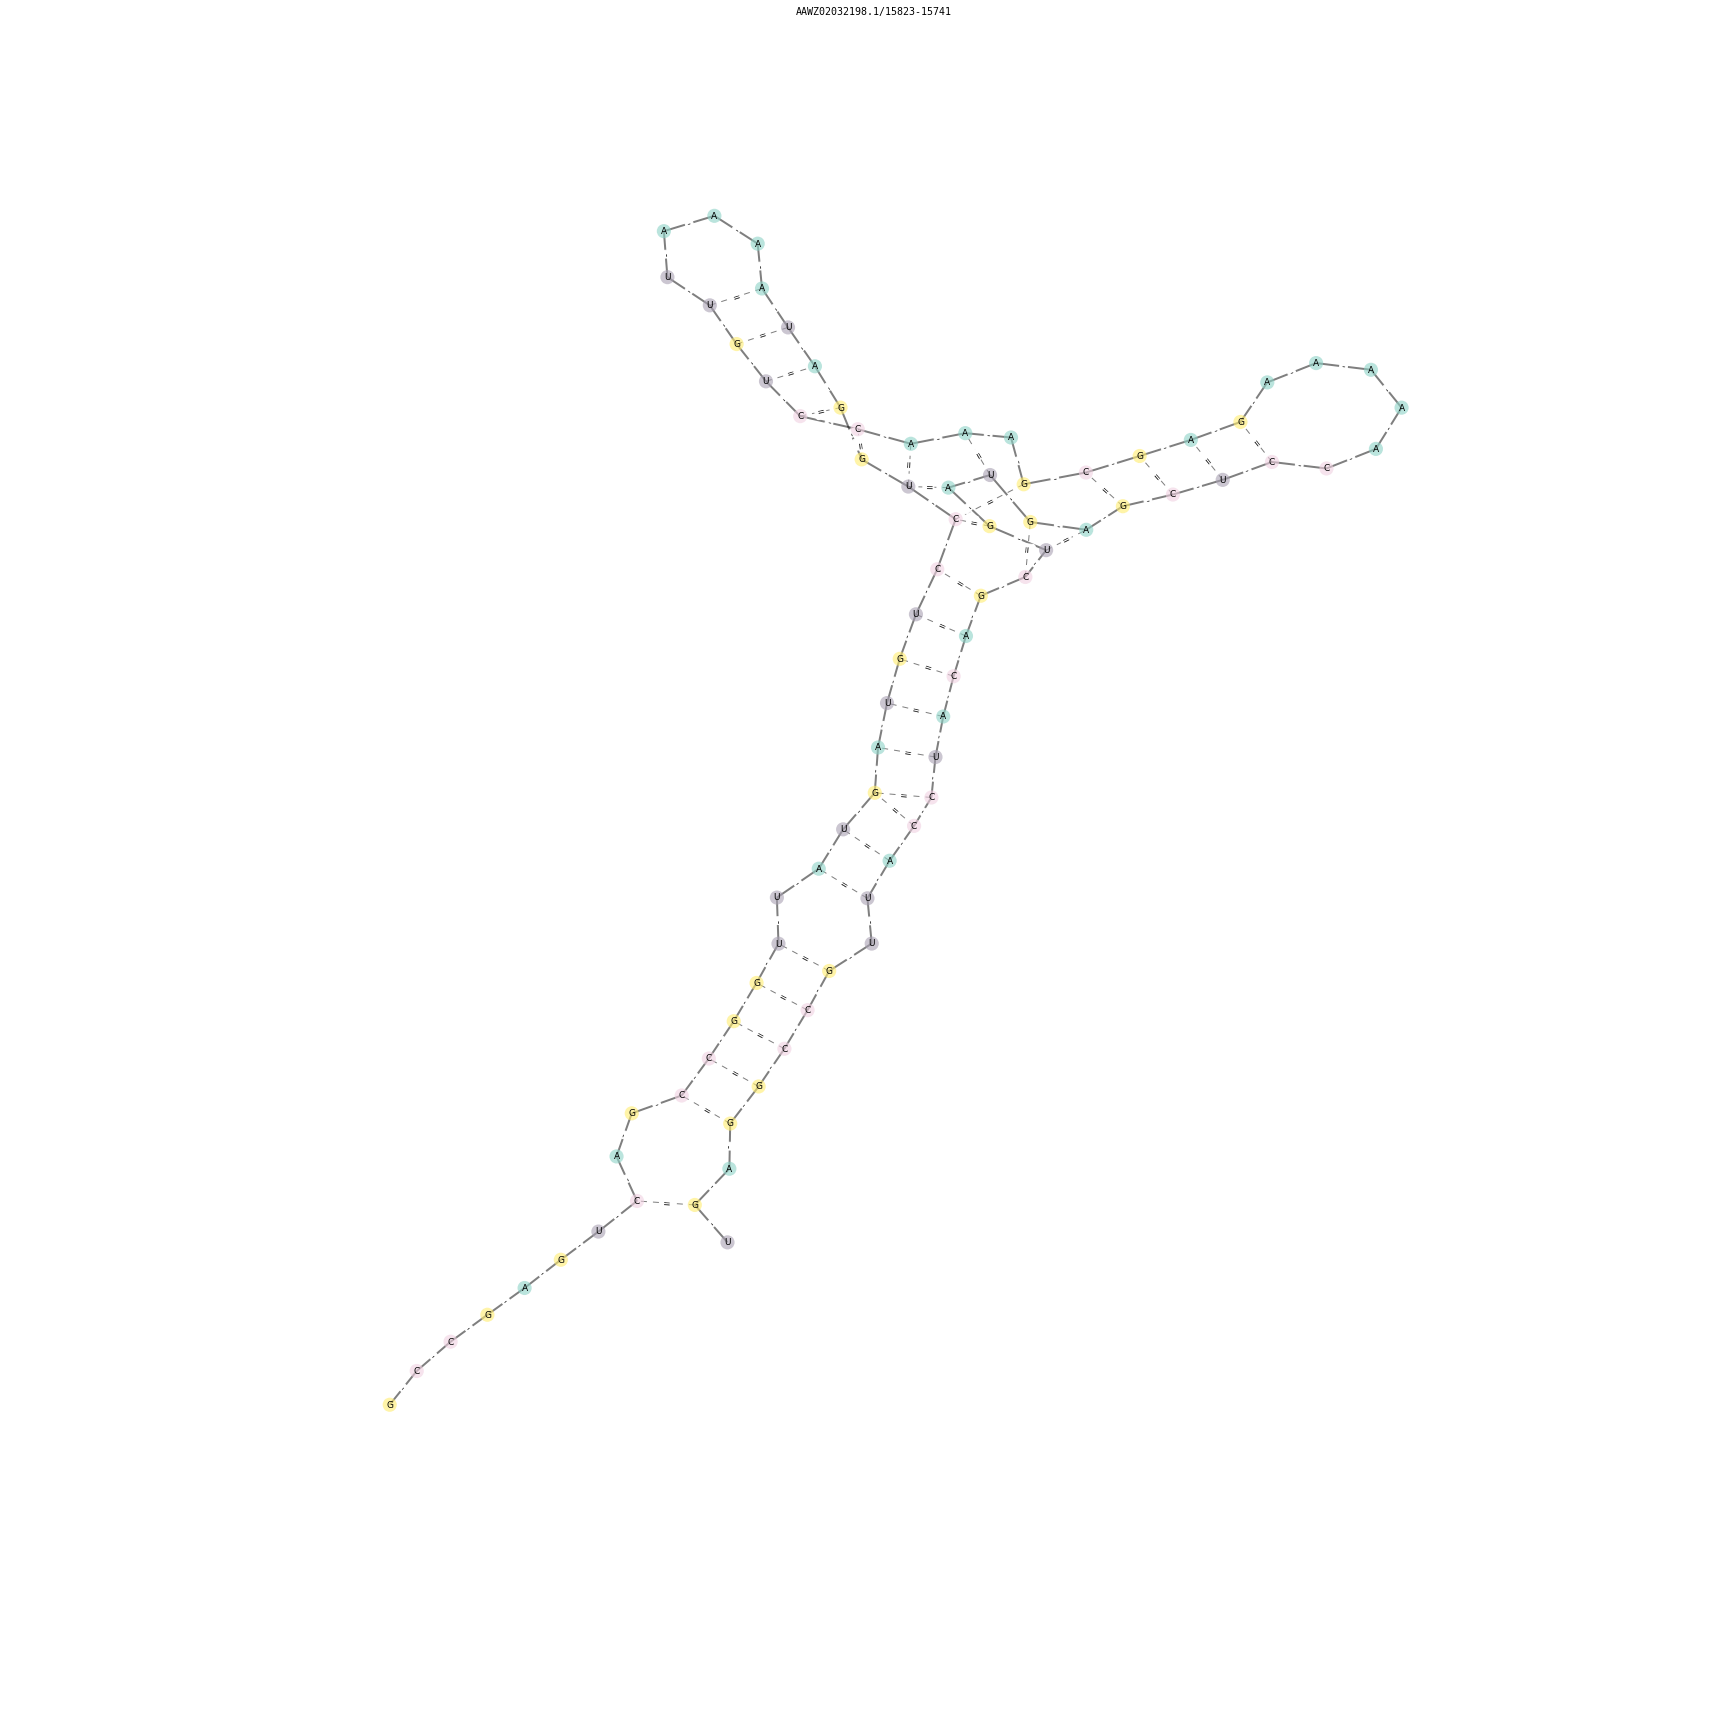

In [60]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'size':30, 'vertex_color':'level', 'colormap':'Set3'})
plot(graphs,opts=my_opt)

In [61]:
def weighter(seqs):
    for header,seq in seqs:
        yield range(len(seq))

def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    from itertools import tee
    seqs,seqs_=tee(seqs)
    
    from eden.converter.rna.rnashapes import rnashapes_to_eden
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=35, max_num=3, split_components=False)
    
    from eden.modifier.graph.vertex_attributes import reweight 
    graphs = reweight(graphs,weighter(seqs_))
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


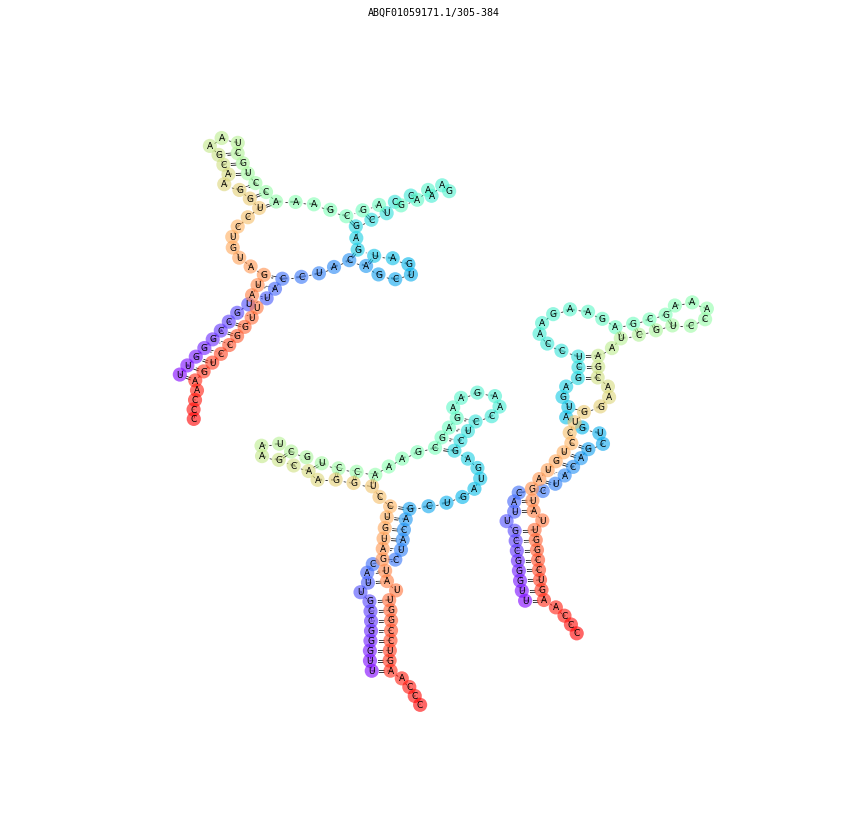

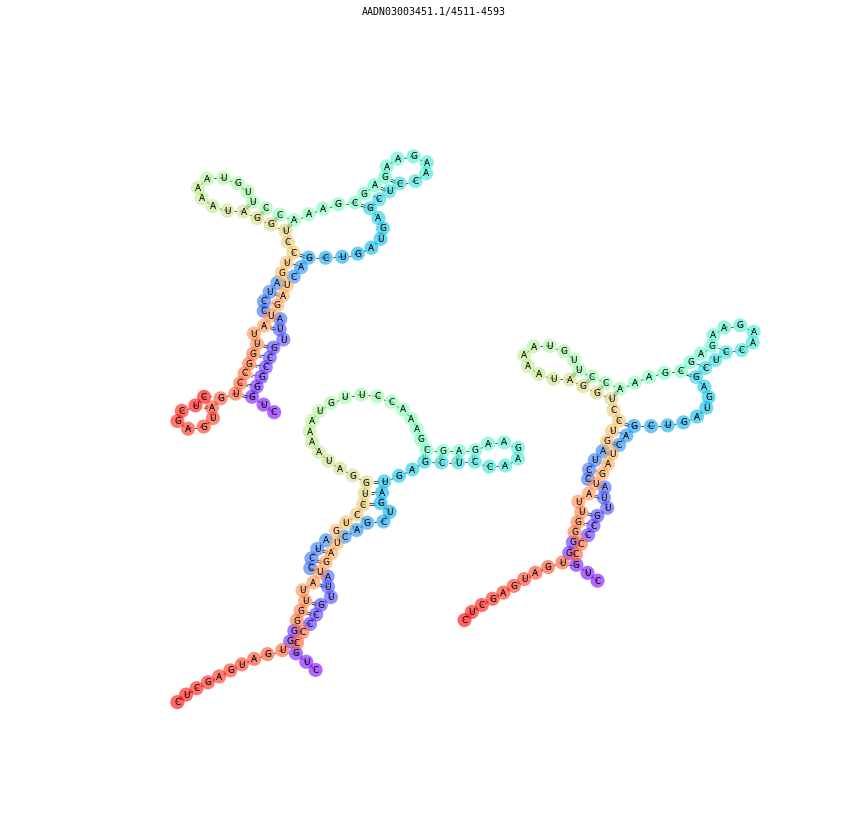

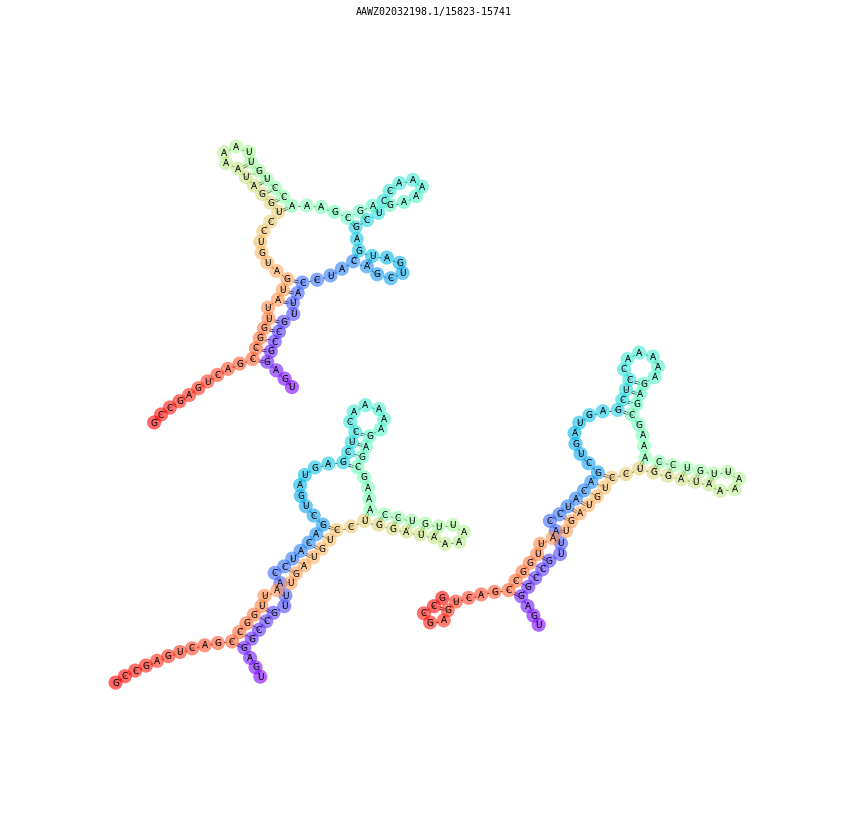

In [62]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'rainbow'})
plot(graphs,opts=my_opt)

In [63]:
def pre_process(data):
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnasubopt import rnasubopt_to_eden
    graphs = rnasubopt_to_eden(seqs, energy_range=10, max_num=4, split_components=False)
    
    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.trapezoidal_reweighting(graphs,
                                                       high_weight = 1, low_weight = 0.0, 
                                                       high_weight_window_start = 25, high_weight_window_end = 35, 
                                                       low_weight_window_start = 15, low_weight_window_end = 45)
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


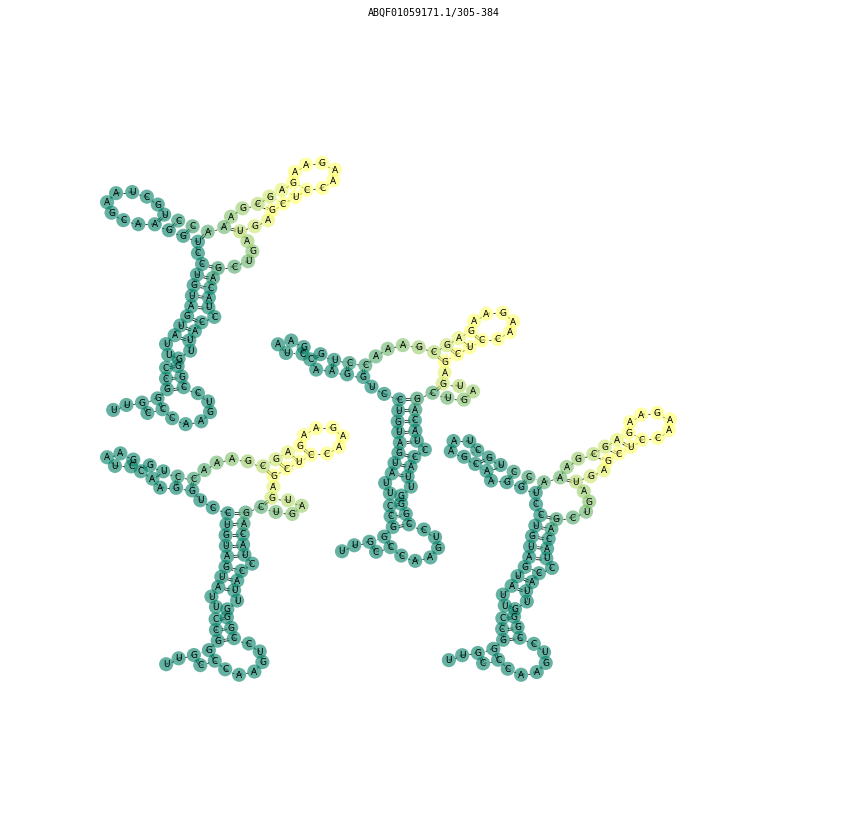

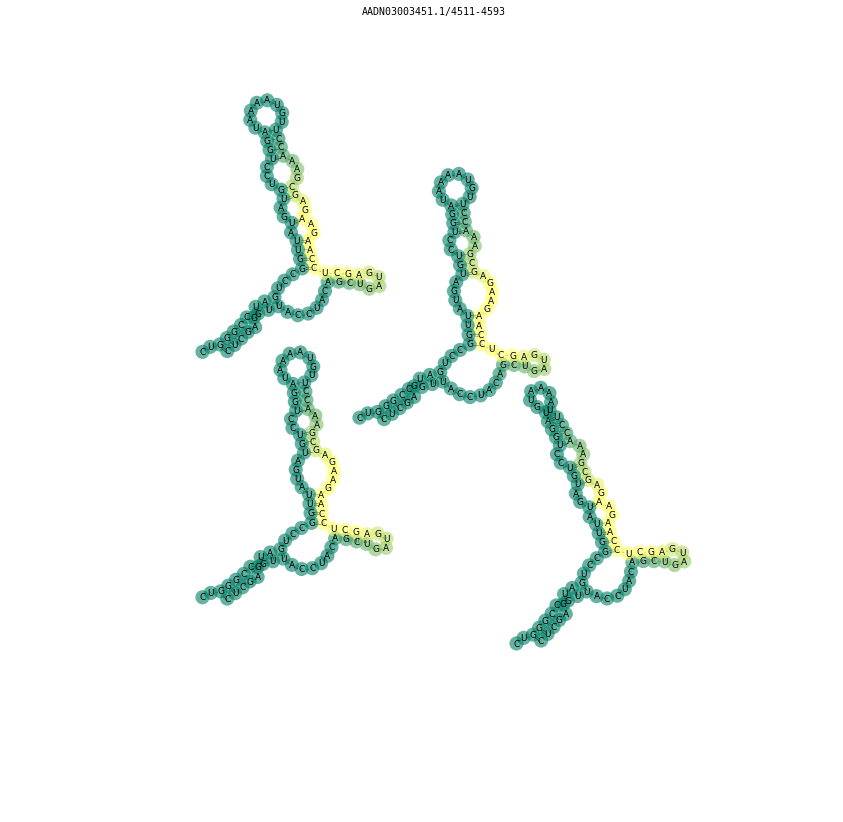

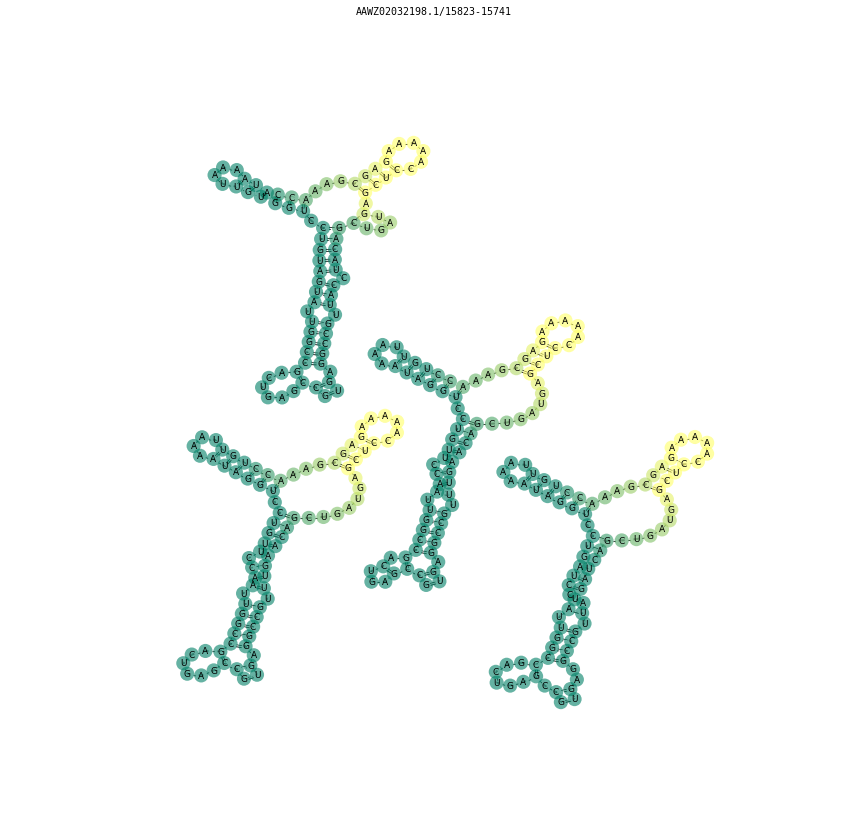

In [64]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'vertex_color':'weight', 'colormap':'summer'})
plot(graphs,opts=my_opt)

In [9]:
def pre_process(data):
    
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)
    
    from eden.converter.rna.rnashapes import rnashapes_to_eden
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=30, max_num=1)
                
    #annotate in node attribute 'type' the incident edges' labels
    from eden.modifier.graph import vertex_attributes
    graphs = vertex_attributes.incident_edge_label(graphs, level = 1, output_attribute = 'type', separator = '.')
    from eden.modifier.graph.structure import contraction, contraction_modifier
    #reduce all 'label' attributes of contracted nodes to a histogram to be written in the 'label' attribute of the resulting graph 
    label_modifier = contraction_modifier(attribute_in='type', attribute_out='label', reduction='set_categorical')
    #reduce all 'weight' attributes of contracted nodes using a sum to be written in the 'weight' attribute of the resulting graph 
    weight_modifier = contraction_modifier(attribute_in='weight', attribute_out='weight', reduction='sum')
    modifiers = [label_modifier, weight_modifier]
    #contract the graph on the 'type' attribute
    graphs = contraction(graphs, contraction_attribute = 'type', modifiers = modifiers, nesting = True)

    from eden.modifier.graph import structure 
    graphs = structure.delete_edge_type(graphs)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['X','A','U','C','G'])
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418


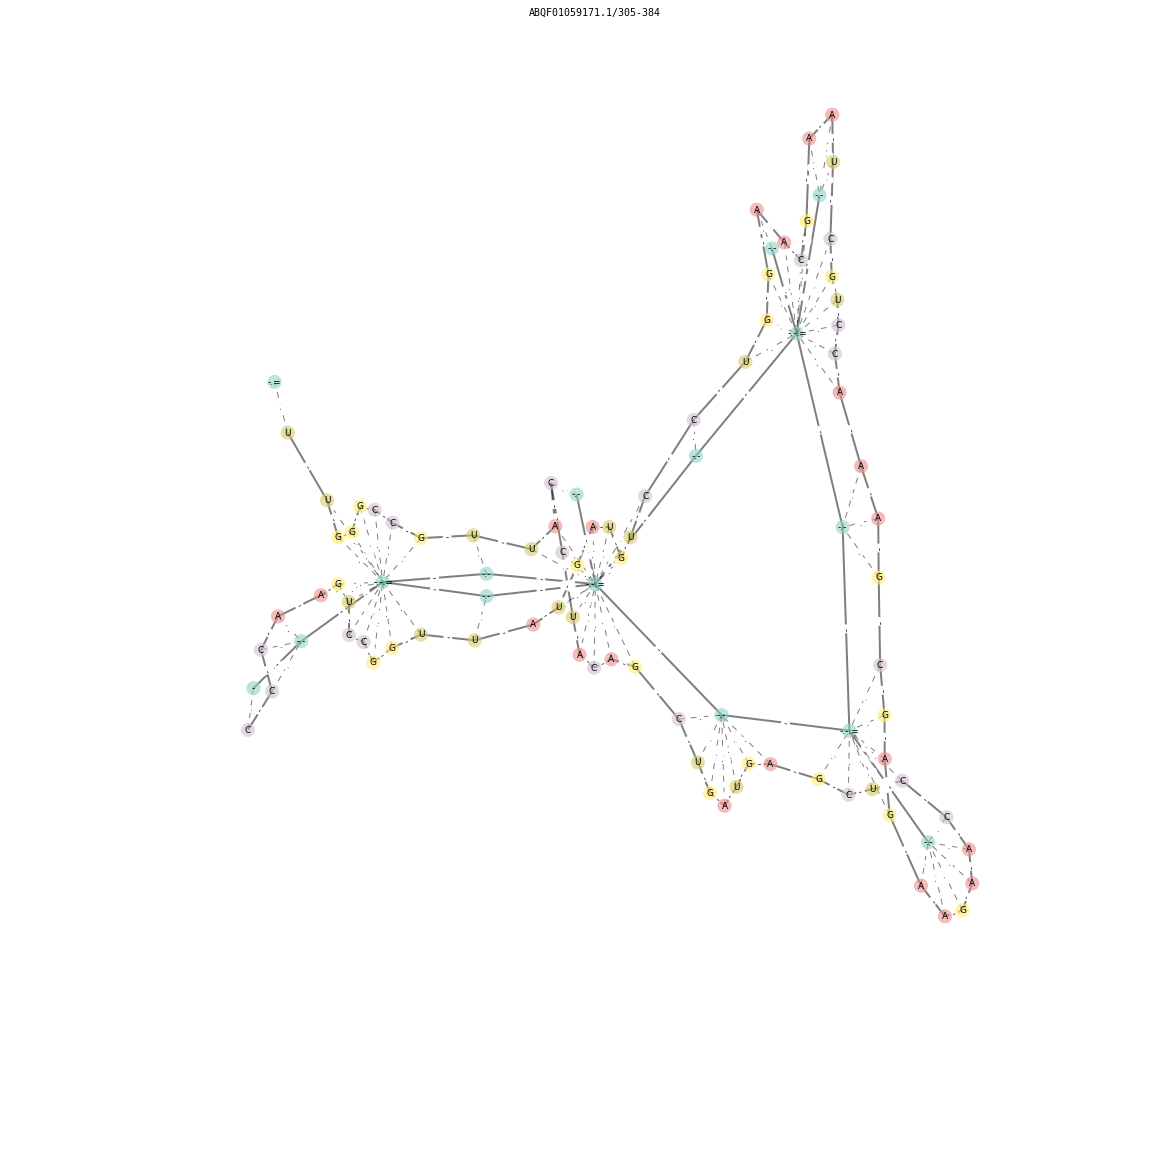

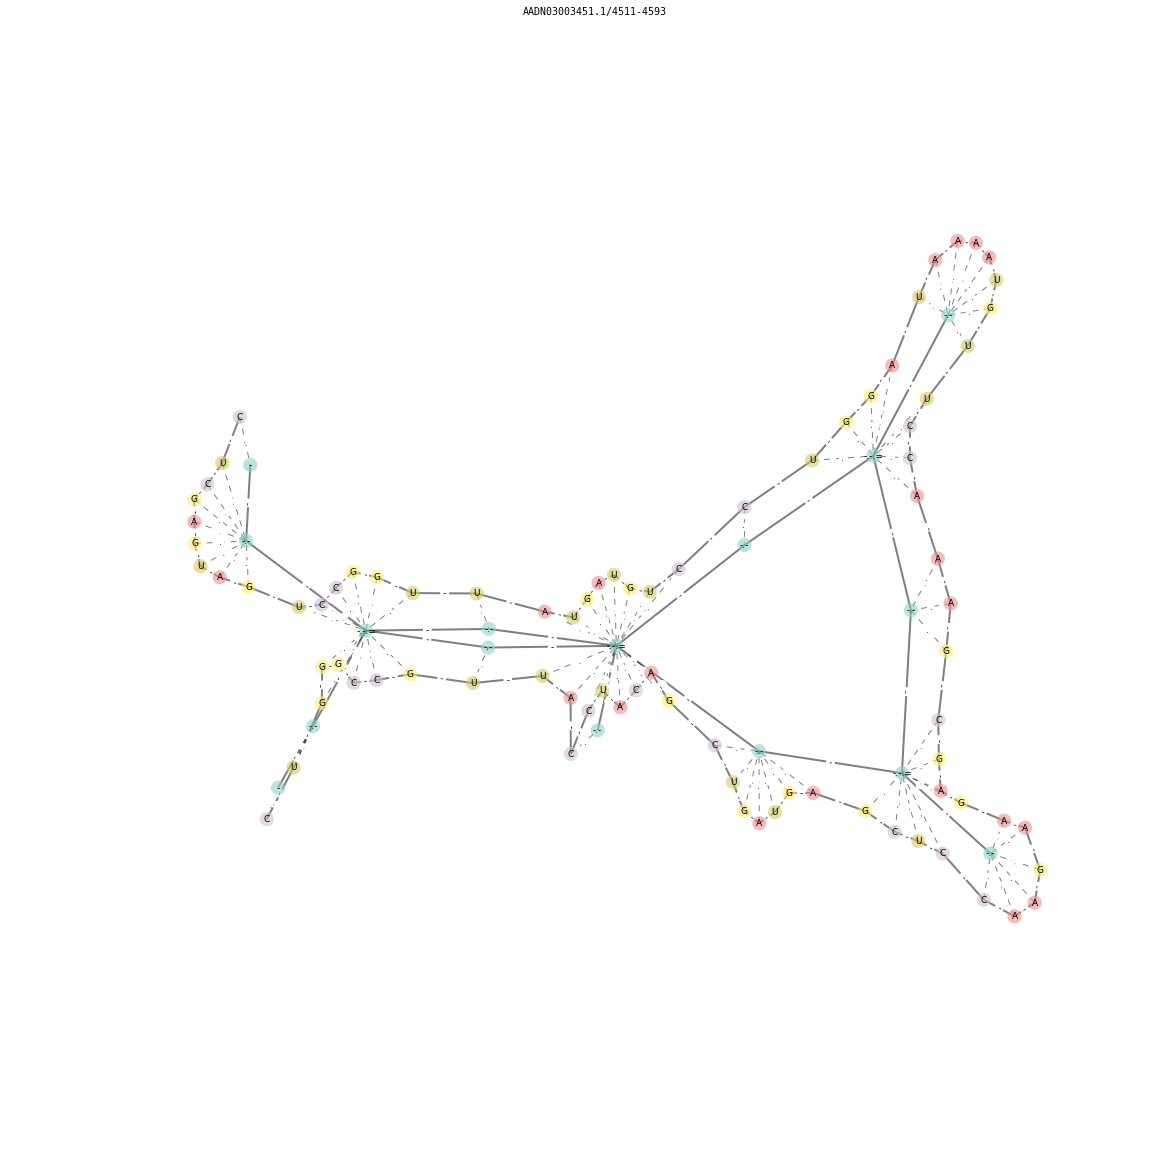

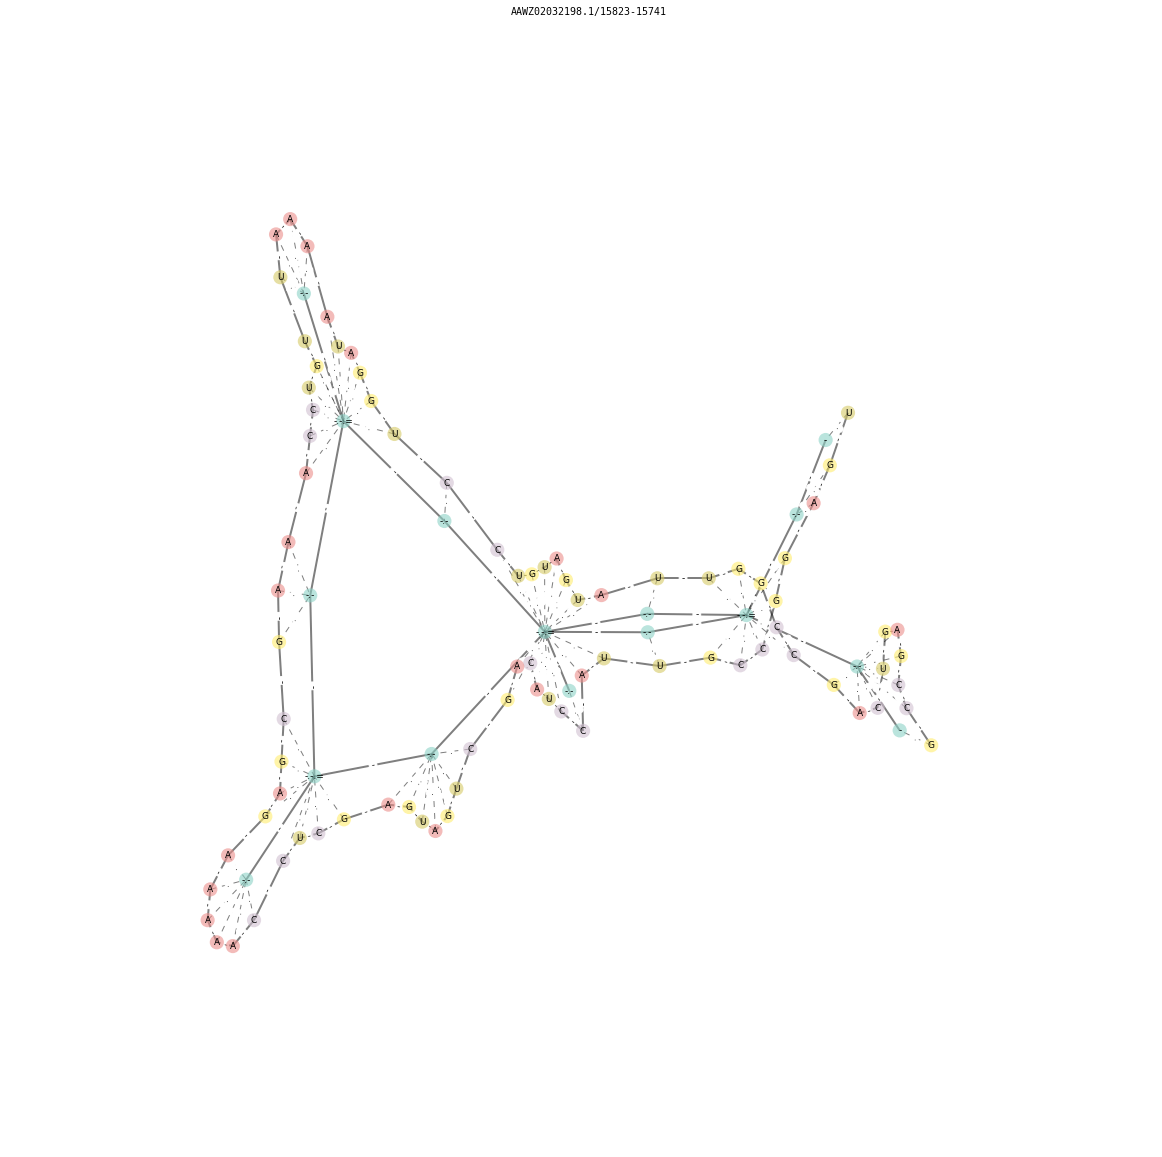

In [11]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
#my_opt.update({'size':20, 'vertex_color':'level', 'colormap':'Set3','prog':'sfdp', 'ignore_for_layout':'nesting'})
my_opt.update({'size':20, 'vertex_color':'level', 'colormap':'Set3','prog':'sfdp'})
plot(graphs,opts=my_opt, num=3)

In [67]:
def pre_process(data):
    
    from eden.converter.fasta import fasta_to_sequence
    seqs = fasta_to_sequence(data)

    # make a copy of the seqs to make negative data
    from itertools import tee
    seqs,seqs_ = tee(seqs)
    from eden.modifier.seq import seq_to_seq, shuffle_modifier
    neg_seqs = seq_to_seq(seqs_, modifier=shuffle_modifier, times=2)

    from eden.converter.rna.rnashapes import rnashapes_to_eden
    graphs = rnashapes_to_eden(seqs, shape_type=5, energy_range=30, max_num=1)
    neg_graphs = rnashapes_to_eden(neg_seqs, shape_type=5, energy_range=30, max_num=1)
    
    #learn a predictive model
    from eden.graph import Vectorizer
    vectorizer=Vectorizer(3)
    graphs,graphs_ = tee(graphs)
    from eden.util import fit
    estimator = fit(graphs_,neg_graphs, vectorizer)
    #annotate
    graphs = vectorizer.annotate(graphs, estimator=estimator)
    # use importance as a binary label in 'type'
    from eden.modifier.graph.vertex_attributes import discretize
    graphs = discretize(graph_list = graphs, output_attribute = 'type', input_attribute='importance', interval=.5)

    from eden.modifier.graph.structure import contraction, contraction_modifier
    #reduce all 'label' attributes of contracted nodes to a histogram to be written in the 'label' attribute of the resulting graph 
    label_modifier = contraction_modifier(attribute_in='type', attribute_out='label', reduction='set_categorical')
    modifiers = [label_modifier]
    #contract the graph on the 'type' attribute
    graphs = contraction(graphs, contraction_attribute = 'type', modifiers = modifiers, nesting = True)

    from eden.modifier.graph import structure 
    graphs = structure.delete_edge_type(graphs)

    from eden.modifier.graph import vertex_attributes 
    graphs = vertex_attributes.colorize(graphs, output_attribute = 'level', labels = ['X','A','U','C','G'])
    
    return graphs

Starting new HTTP connection (1): rfam.xfam.org
"GET /family/RF02275/alignment?acc=RF02275&format=fastau&download=0 HTTP/1.1" 200 3418
Positive data: Instances: 33 ; Features: 1048577 with an avg of 1230 features per instance
Negative data: Instances: 66 ; Features: 1048577 with an avg of 1230 features per instance
Elapsed time: 4.3 secs


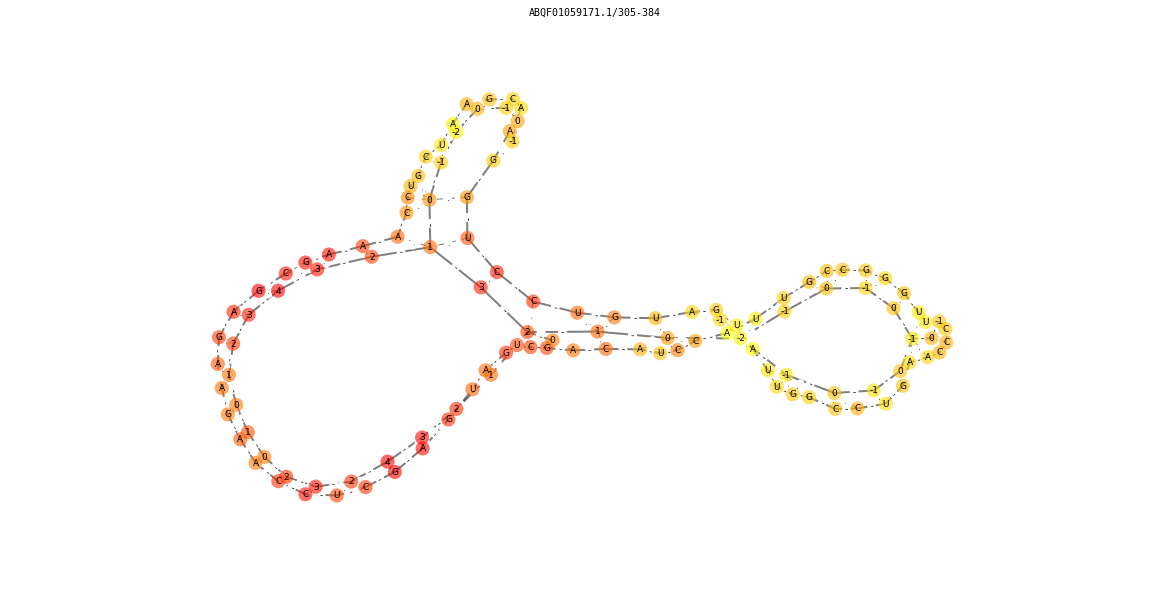

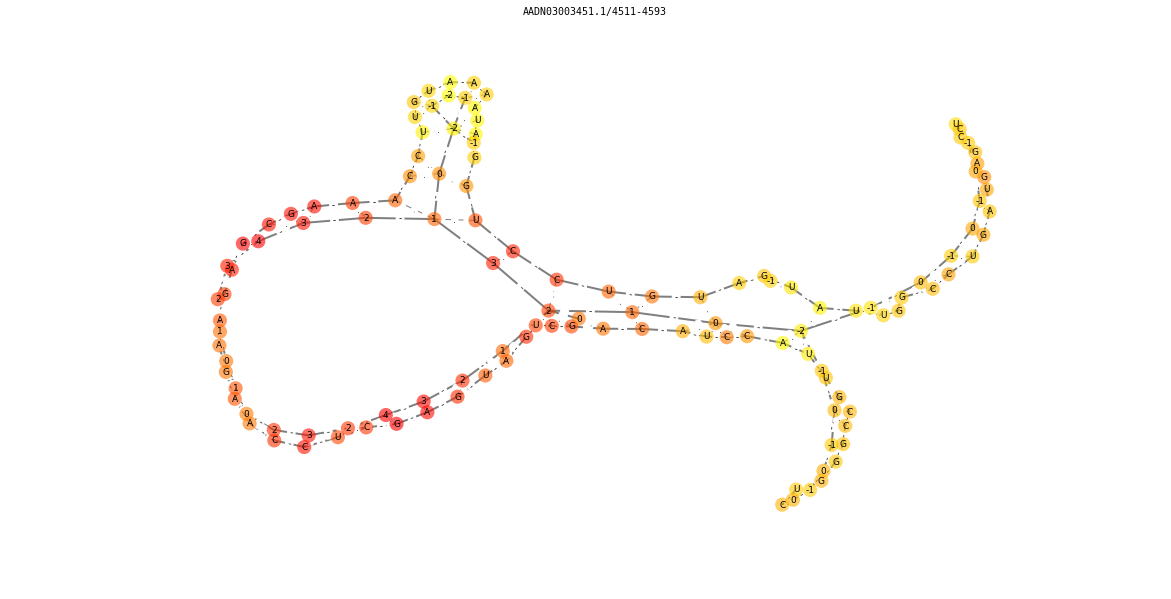

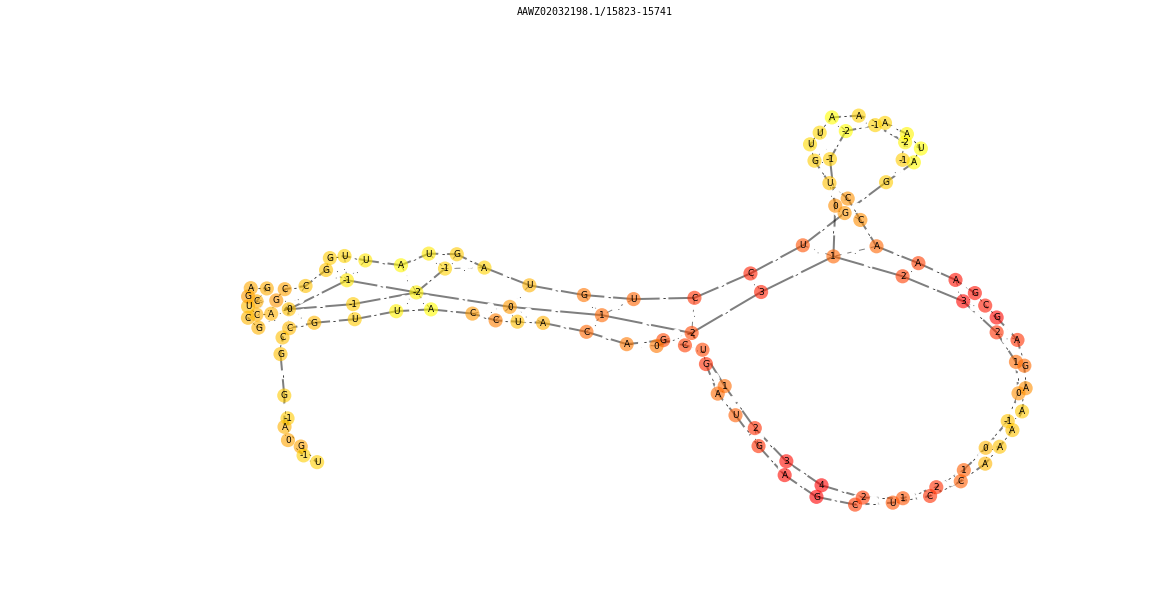

In [68]:
graphs = pre_process(rfam_uri(rfam_id))
my_opt=dict(opts)
my_opt.update({'size':20, 'vertex_color':'importance', 'colormap':'autumn', 'invert_colormap':True, 'prog':'sfdp', 'size_x_to_y_ratio':2})
plot(graphs,opts=my_opt, num=3)

---